In [108]:
import sklearn 
import pandas as  pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import datasets

In [239]:
calhouse=sklearn.datasets.fetch_california_housing()
dfx=pd.DataFrame(calhouse.data, columns=calhouse.feature_names)
dfy=pd.DataFrame(calhouse.target, columns=['y'])
df=pd.concat([dfx, dfy], axis=1)

In [240]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [241]:
dfx.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [242]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


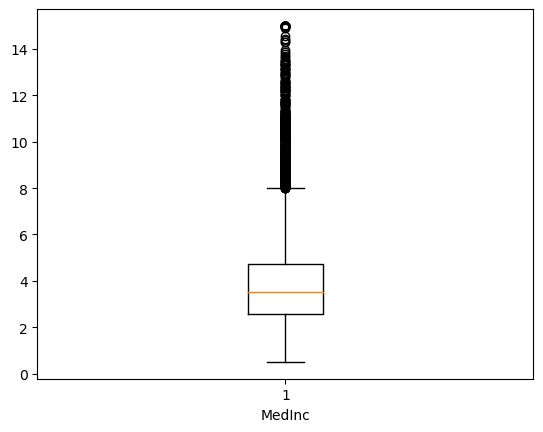

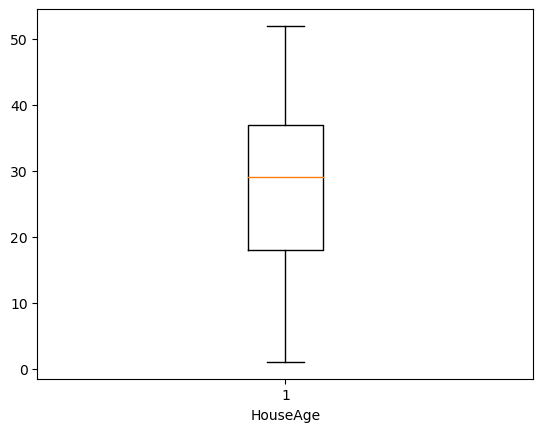

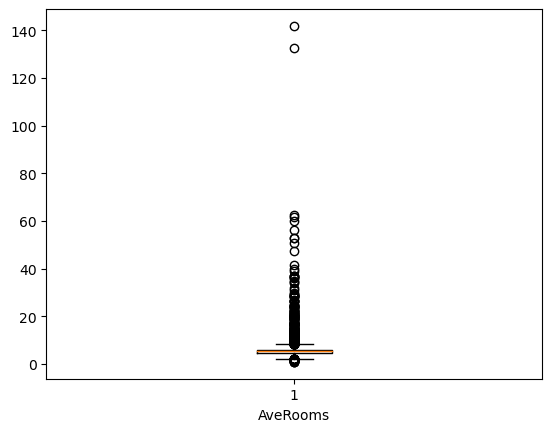

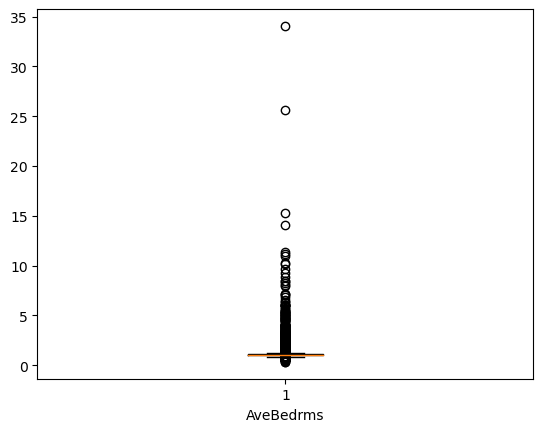

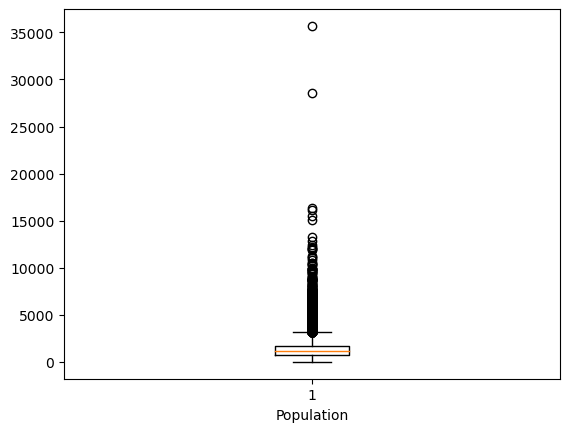

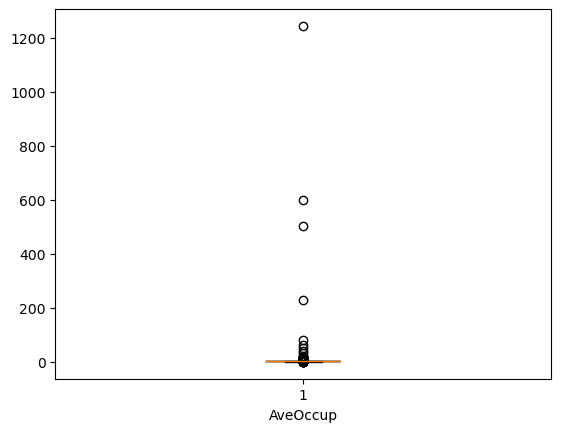

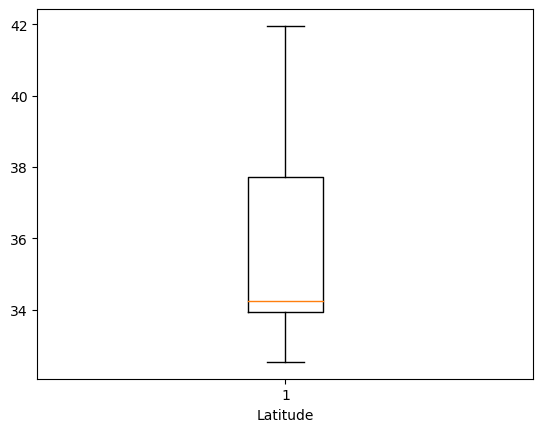

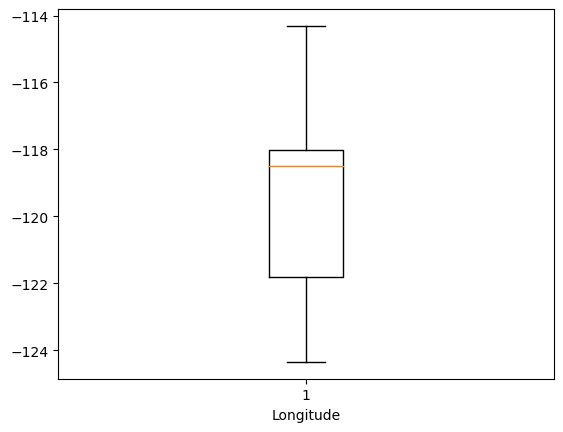

In [243]:
for i in dfx.columns:
    plt.boxplot(dfx[i])
    plt.xlabel(i)
    plt.show()

- 컬럼 설명서
- longitude : 경도
- latitude : 위도
- housing_median_age : 주택 나이(중앙값)
- total_rooms : 전체 방 수
- total_bedrooms : 전체 침실 수
- population : 인구 수
- households : 세대 수
- median_income : 소득(중앙값)
- median_house_value : 주택 가치(중앙값)
- ocean_proximity : 바다 근접도

In [244]:
#모든 변수로 선형회귀 시
model1 = sm.OLS.from_formula('y~'+'+'.join(calhouse.feature_names),data=df)
res1 = model1.fit()

In [245]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        18:27:22   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [246]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
dfx_ss=ss.fit_transform(dfx)
dfx_ss=pd.DataFrame(dfx_ss, index=dfx.index, columns=dfx.columns)
data=dfx_ss
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


In [247]:
#스케일링 후 
df_ss=pd.concat([data,dfy], axis=1)
model2 = sm.OLS.from_formula('y~'+'+'.join(calhouse.feature_names),data=df_ss)
res2 = model2.fit()

In [248]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        18:27:29   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0686      0.005    410.326      0.000       2.059       2.078
MedInc         0.8296      0.008    104.054      0.000       0.814       0.845
HouseAge       0.1188      0.006     21.143      0.000       0.108       0.130
AveRooms      -0.2655      0.015    -18.235      0.000      -0.294      -0.237
AveBedrms      0.3057      0.013     22.928      0.000       0.280       0.332
Population    -0.0045      0.005     -0.837      0.402      -0.015       0.006
AveOccup      -0.0393      0.005     -7.769      0.000      -0.049      -0.029
Latitude      -0.8999      0.015    -58.541      0.000      -0.930      -0.870
Longitude     -0.8705      0.015    -57.682      0.000      -0.900      -0.841
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                         6.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

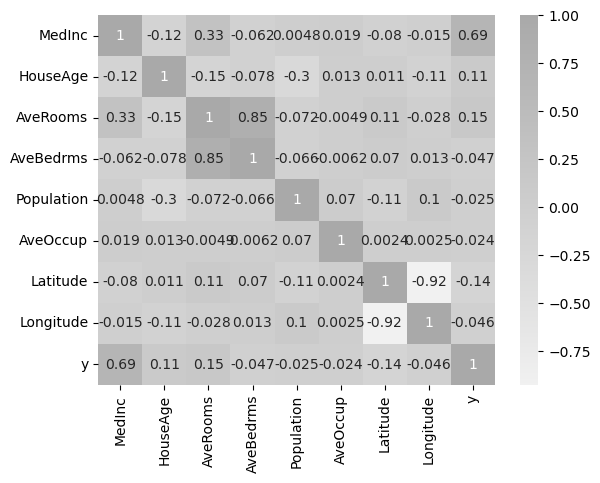

In [193]:
# 상관행렬 시각화
import seaborn as sns  
import matplotlib.pyplot as plt
cmap = sns.light_palette("darkgray", as_cmap = True)  
sns.heatmap(df.corr(), annot = True, cmap = cmap)
plt.show()

In [ ]:
# 변수간 상관관계가 높은 경우 다중공선성 의심됨 (AveBedrms와 AveRooms)

In [249]:
#vif를 통한 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfx.values, i) for i in range(dfx.shape[1])]
vif["features"] = dfx.columns
vif

#Longitude와 Latitude 변수가 함께 크게 뛰어 다중공선성 있음 판단

,VIF Factor,features
0,11.511140,MedInc
1,7.195917,HouseAge
2,45.993601,AveRooms
3,43.590314,AveBedrms
4,2.935745,Population
5,1.095243,AveOccup
6,559.874071,Latitude
7,633.711654,Longitude


In [301]:
#longitude 제거해보기

dfx_1=dfx.drop(['Longitude', 'Latitude', 'AveBedrms'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfx_1.values, i) for i in range(dfx_1.shape[1])]
vif["features"] = dfx_1.columns
vif

,VIF Factor,features
0,5.111195,MedInc
1,3.276300,HouseAge
2,5.137411,AveRooms
3,2.136316,Population
4,1.094552,AveOccup


In [280]:
model3 = sm.OLS(dfy, dfx_1)
res3 = model3.fit()

In [281]:
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          6.805e+04
Date:                Sat, 27 May 2023   Prob (F-statistic):                        0.00
Time:                        18:39:46   Log-Likelihood:                         -26162.
No. Observations:               20640   AIC:                                  5.233e+04
Df Residuals:                   20638   BIC:                                  5.234e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.4938      0.003    171.235      0.000       0.488       0.499
AveRooms       0.0149      0.002      7.137      0.000       0.011       0.019
==============================================================================
Omnibus:                     3694.818   Durbin-Watson:                   0.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9004.462
Skew:                           1.005   Prob(JB):                         0.00
Kurtosis:                       5.536   Cond. No.                         4.14
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
dfx_ss=ss.fit_transform(dfx_1)
dfx_ss=pd.DataFrame(dfx_ss, index=dfx_1.index, columns=dfx_1.columns)
data=dfx_ss
data.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup
0,2.344766,0.982143,-0.153758,-0.974429,-0.049597
1,2.332238,-0.607019,-0.263336,0.861439,-0.092512
2,1.782699,1.856182,-0.049016,-0.820777,-0.025843
3,0.932968,1.856182,-0.049833,-0.766028,-0.050329
4,-0.012881,1.856182,-0.032906,-0.759847,-0.085616


In [256]:
model4 = sm.OLS(dfy, data)
res4 = model4.fit()

In [257]:
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.122
Model:                            OLS   Adj. R-squared (uncentered):              0.121
Method:                 Least Squares   F-statistic:                              570.9
Date:                Sat, 27 May 2023   Prob (F-statistic):                        0.00
Time:                        18:28:20   Log-Likelihood:                         -45748.
No. Observations:               20640   AIC:                                  9.151e+04
Df Residuals:                   20635   BIC:                                  9.155e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.8237      0.016     52.726      0.000       0.793       0.854
HouseAge       0.2343      0.016     14.269      0.000       0.202       0.266
AveBedrms      0.0179      0.016      1.145      0.252      -0.013       0.048
Population     0.0416      0.016      2.548      0.011       0.010       0.074
AveOccup      -0.0487      0.016     -3.143      0.002      -0.079      -0.018
==============================================================================
Omnibus:                     4192.712   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10012.167
Skew:                           1.139   Prob(JB):                         0.00
Kurtosis:                       5.541   Cond. No.                         1.44
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [258]:
#이상치가 많아 robustscaling 진행
from sklearn.preprocessing import RobustScaler
ss=RobustScaler()
dfx_ss=ss.fit_transform(dfx_1)
dfx_ss=pd.DataFrame(dfx_ss, index=dfx_1.index, columns=dfx_1.columns)
data=dfx_ss
data.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup
0,2.197582,0.631579,-0.267221,-0.899787,-0.307981
1,2.186664,-0.421053,-0.822926,1.316631,-0.830800
2,1.707732,1.210526,0.263955,-0.714286,-0.018599
3,0.967177,1.210526,0.259814,-0.648188,-0.316908
4,0.142854,1.210526,0.345657,-0.640725,-0.746784


In [259]:
model5 = sm.OLS(dfy, data)
res5 = model5.fit()

In [260]:
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.290
Model:                            OLS   Adj. R-squared (uncentered):              0.290
Method:                 Least Squares   F-statistic:                              1688.
Date:                Sat, 27 May 2023   Prob (F-statistic):                        0.00
Time:                        18:28:33   Log-Likelihood:                         -43547.
No. Observations:               20640   AIC:                                  8.710e+04
Df Residuals:                   20635   BIC:                                  8.714e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         1.3312      0.016     84.028      0.000       1.300       1.362
HouseAge       0.5699      0.022     25.651      0.000       0.526       0.613
AveBedrms      0.0504      0.003     18.351      0.000       0.045       0.056
Population     0.4105      0.012     34.775      0.000       0.387       0.434
AveOccup      -0.0037      0.001     -3.227      0.001      -0.006      -0.001
==============================================================================
Omnibus:                     4539.300   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           129317.928
Skew:                          -0.409   Prob(JB):                         0.00
Kurtosis:                      15.235   Cond. No.                         19.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#aic와 bic가 오히려 증가하여 문제가 있어 보임..